# MFC dataset analysis

In [9]:
import os

os.listdir(os.getcwd())

['FRISS_srl.pkl',
 'README.md',
 'notebooks',
 'chunks.pkl',
 'grid_search_metrics.csv',
 '.git',
 'assets',
 'friss',
 'models',
 '.ipynb_checkpoints',
 'data',
 '.gitignore',
 'frameaxis']

In [33]:
labeled_path = "data/mfc/immigration_labeled.json"
unlabeled_path = "data/mfc/immigration_unlabeled.json"
frames_code = "data/mfc/codes.json"

In [36]:
# read unlabeled data
import json

with open(unlabeled_path) as f:
    unlabeled = json.load(f)

# read labeled data
with open(labeled_path) as f:
    labeled = json.load(f)

# read frames
with open(frames_code) as f:
    codes = json.load(f)


In [37]:
# generate statistics count

print("labeled data count: ", len(labeled))
print("unlabeled data count: ", len(unlabeled))

labeled data count:  6757
unlabeled data count:  41966


In [95]:
frames = []

# loop through labeled data
for idx, article in labeled.items():

    # get the frame
    primary_frame = article["primary_frame"]

    # if primary frame is nan return 15.2
    if primary_frame == None:
        primary_frame = 15.2

    # get the frame text return none if not found
    frame_text = codes.get(str(primary_frame), "Other")

    meta = {
        "id": idx,
        "frame": primary_frame,
        "frame_text": frame_text,
        "irrelevant": article["irrelevant"],
        "year": article["year"],
        "month": article["month"],
        "text": article["text"],
    }
    frames.append(meta)

In [96]:
# generate statistics count
import pandas as pd

df = pd.DataFrame(frames)
df.head()


,id,frame,frame_text,irrelevant,year,month,text
0,Immigration1.0-10005,10.2,Quality of Life primary,0.0,2001,8,IMM-10005\n\nPRIMARY\n\nImmigrants without HOP...
1,Immigration1.0-10006,5.2,"Legality, Constitutionality, Jurisdiction primary",0.0,2001,8,"IMM-10006\n\nPRIMARY\n\nReaction to Tancredo, ..."
2,Immigration1.0-10013,2.2,Capacity and Resources primany,0.0,2001,8,"IMM-10013\n\nPRIMARY\n\n$50,000 per entry\n\nT..."
3,Immigration1.0-10015,10.2,Quality of Life primary,0.0,2001,8,IMM-10015\n\nPRIMARY\n\nDangerous crossing; PU...
4,Immigration1.0-10018,15.2,Other primary,0.0,2001,8,IMM-10018\n\nPRIMARY\n\nCHILDREN OF LATINO IMM...


In [85]:
# show irrelevant articles
df[df["irrelevant"] == 1.0]

,id,frame,frame_text,irrelevant,year,month
14,Immigration1.0-1012,15.2,Other primary,1.0,1995,11
49,Immigration1.0-10314,15.2,Other primary,1.0,2001,10
63,Immigration1.0-10387,15.2,Other primary,1.0,2001,10
70,Immigration1.0-10420,15.2,Other primary,1.0,2001,10
71,Immigration1.0-10421,15.2,Other primary,1.0,2001,10
...,...,...,...,...,...,...
6715,Immigration1.0-9746,15.2,Other primary,1.0,2001,5
6717,Immigration1.0-975,15.2,Other primary,1.0,1995,11
6718,Immigration1.0-9757,15.2,Other primary,1.0,2001,5
6742,Immigration1.0-9917,15.2,Other primary,1.0,2001,8


In [86]:
def get_frame_frequency(df):
    # Calculate relevant and irrelevant counts
    relevant = df[df['irrelevant'] == 0.0].groupby(['frame', 'frame_text']).size().reset_index(name='relevant_count')
    irrelevant = df[df['irrelevant'] == 1.0].groupby(['frame', 'frame_text']).size().reset_index(name='irrelevant_count')
    
    # Calculate relative frequencies
    relevant['relevant_percentage'] = (relevant['relevant_count'] / len(df) * 100).map("{:.2f}%".format)
    irrelevant['irrelevant_percentage'] = (irrelevant['irrelevant_count'] / len(df) * 100).map("{:.2f}%".format)

    # Merge the two dataframes
    frame_count = pd.merge(relevant, irrelevant, on=['frame', 'frame_text'], how='outer').fillna(0)
    
    # Format the output as a table
    frame_count = frame_count[['frame', 'frame_text', 'relevant_count', 'relevant_percentage', 'irrelevant_count', 'irrelevant_percentage']]

    return frame_count

get_frame_frequency(df)

,frame,frame_text,relevant_count,relevant_percentage,irrelevant_count,irrelevant_percentage
0,1.2,Economic primary,412,6.10%,0.0,0
1,2.2,Capacity and Resources primany,210,3.11%,0.0,0
2,3.2,Morality primary,76,1.12%,0.0,0
3,4.2,Fairness and Equality primary,155,2.29%,0.0,0
4,5.2,"Legality, Constitutionality, Jurisdiction primary",955,14.13%,0.0,0
5,6.2,Policy Presecription and Evaluation primary,471,6.97%,0.0,0
6,7.2,Crime and Punishment primary,794,11.75%,0.0,0
7,8.2,Security and Defense primary,283,4.19%,0.0,0
8,9.2,Health and Safety primary,236,3.49%,0.0,0
9,10.2,Quality of Life primary,408,6.04%,0.0,0


In [65]:
# calculate the absolut and relative frequency of irrelevant articles
def get_irrelevant_frequency(df):
    irrelevant_count = df.groupby(["irrelevant"]).size().reset_index(name="count")
    irrelevant_count["relative_frequency"] = irrelevant_count["count"] / len(df) * 100 # relative frequency
    # format the relative frequency as percentage string with %
    irrelevant_count["relative_frequency"] = irrelevant_count["relative_frequency"].map("{:.2f}%".format)
    return irrelevant_count

get_irrelevant_frequency(df)

,irrelevant,count,relative_frequency
0,0.0,6097,90.23%
1,1.0,609,9.01%


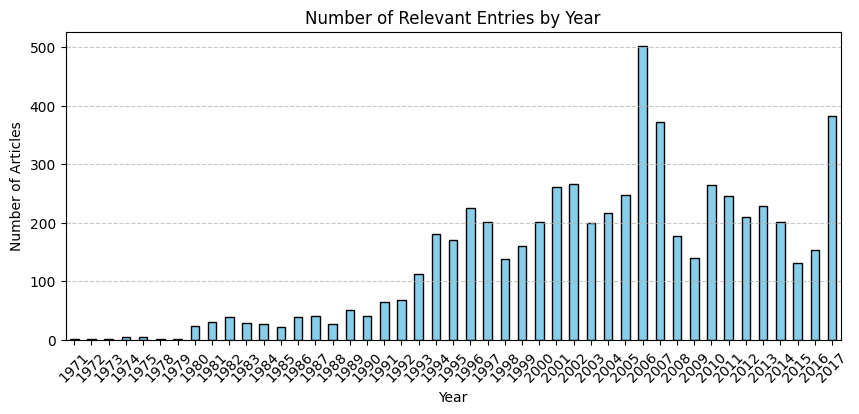

In [103]:
import matplotlib.pyplot as plt

# Filtering and grouping the data
filtered_df = df[df["irrelevant"] == 0].groupby("year").size()

# Plotting
plt.figure(figsize=(10, 4))
filtered_df.plot(kind="bar", color='skyblue', edgecolor='black')
plt.title("Number of Relevant Entries by Year")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

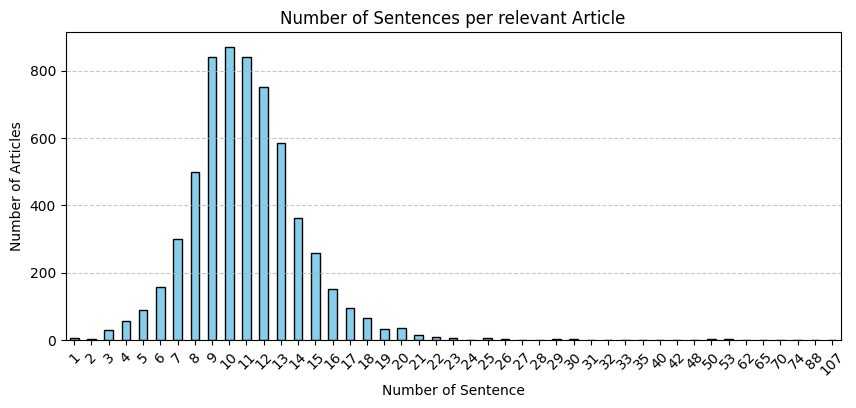

In [104]:
# can you split the text into sentences and return statistics
import nltk
from nltk.tokenize import sent_tokenize

def get_sentence_count(text):
    return len(sent_tokenize(text))

df["sentence_count"] = df["text"].apply(get_sentence_count)
df.head()

# plot the sentence count
plt.figure(figsize=(10, 4))

# Filtering and grouping the data
filtered_df = df[df["irrelevant"] == 0].groupby("sentence_count").size()

# Plotting
filtered_df.plot(kind="bar", color='skyblue', edgecolor='black')
plt.title("Number of Sentences per relevant Article")
plt.xlabel("Number of Sentence")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [100]:
df["sentence_count"].describe()

count    6757.000000
mean       11.020867
std         4.523671
min         1.000000
25%         9.000000
50%        11.000000
75%        13.000000
max       114.000000
Name: sentence_count, dtype: float64